# ExtraaLearn Project

## Importing necessary libraries and data

In [429]:
# Import libraries for reading, visualizing and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Decision tree, Random Forest algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Model performance evaluation imports
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn import metrics

# Hyperparameter tuning imports
from sklearn.model_selection import GridSearchCV

In [430]:
# Read the data
lead = pd.read_csv('ExtraaLearn.csv')

In [431]:
# Copy the data in a new variable
df = lead.copy()

In [432]:
# Returns the first 5 rows
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [433]:
# Returns the last 5 rows
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


## Data Overview

In [434]:
# Calculate the number of rows and columns
dimensions = df.shape
# Print how many rows and columns are in the database
print(dimensions)

(4612, 15)


<b>Observations:</b>
- The number of rows in the database is 4612 and the number of columns is 15

In [435]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

<b>Observations:</b>
- There are 5 numerical columns (1 float, 4 integers)
- There are 10 object type columns
- All columns have the same number of entries

In [436]:
# Add up any missing values in each column
df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

<b>Observations:</b>
- No missing values identified

In [437]:
# Checking the count of unique values in each column
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

<b>Observations:</b>
- All ID values are unique, this means having it as a separate column might be redundant
- There exist 46 different age groups
- Age, website_visits, time_spent_on_website, page_views_per_visit are all continuous variables
- Current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status are all categorical variables

In [438]:
# Checking for duplicates in the dataset
df.duplicated().sum()

0

<b>Observations:</b>
- No duplicates found

In [439]:
# Drop ID column
df.drop(["ID"], axis=1, inplace=True)

<b>Observations</b>
- As mentioned above, we can drop the ID column as it is not necessary.

## Exploratory Data Analysis (EDA)

In [440]:
# Statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


<b>Observations:</b>
- Status mean (average) is 0.29857, which is less than 0.5, which indicates that more leads are not paid customers compared to paid customers, since paid = 1, not paid = 0.
- Age range of leads is 18-63, so it does not include underage people and seniors.
- Average (mean) website visits per lead is 3.56678 which is almost the same as the mode of 3.00000. Since the mean is higher than the mode, this indicates that there is a slight right skew distribution.
- The average time spent on the website (724.01127s) is significantly higher than the most common time spent on the website (376.00000s), therefore there is a clear right skew distribution.


In [441]:
# List of categorical variables
cat_col = list(df.select_dtypes("object").columns)

# Value proportions in every column
for column in cat_col:
    # Using 1 to normalize the proportion
    print(df[column].value_counts(1))
    print("-" * 50)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
--------------------------------------------------
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
--------------------------------------------------
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
--------------------------------------------------
No     0.84

<b>Observations:</b>
- Over half (57%) of leads are Professionals, a third (31%) are unemployed and the rest are students.
- First interactions are split almost evenly with slightly more people finding ExtraaLearn through a website (55%) than the mobile app (45%).
- Most people have highly finished (49%) profiles or medium (49%), and only a small percentage (2%) of leads have low-filled profiles.
- Half of all recent activities were emails between leads and ExtraaLearn (49%), the phone activities followed with just over a quarter (27%) and the lowest activity was on the website (24%).
- Most leads, over 4/5 or 89% had not seen ExtraaLearn advertisements in Newspapers and the rest had.
- Almost all leads, 95% had not seen ExtraaLearn advertisements in Magazines and the rest had.
- Most leads, over 4/5 or 89% had seen ExtraaLearn advertisements on digital platforms and the rest had not.
- Most people (85%) had not heard of ExtraaLearn in the education channels, and some (15%) had.
- Barely any leads, only 2%, had heard about ExtraaLearn through a reference.

<b>Univariate Analysis</b>

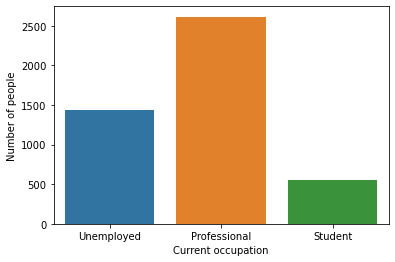

In [442]:
# Count plot: current occupations of people
sns.countplot(x = df['current_occupation'])
# Label axes
plt.xlabel("Current occupation")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- Over 2500 leads are Professionals, just a bit under 1500 are unemployed and the 500 are students.
- The number of professionals is higher than the unemployed and students combined.

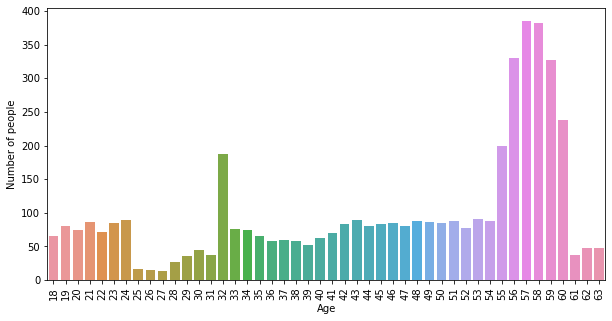

In [443]:
# Increase plot size
plt.figure(figsize=(10, 5))
# Count plot: ages of people
sns.countplot(x = df['age'])
# Rotate x labels to avoid overlay
plt.xticks(rotation=90)
# Label axes
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- The plot shows the number of people for each age group.
- Most people are between 56 and 59 years of age, followed by 55 and 60 year olds.
- There is a spike for the age group of 32.

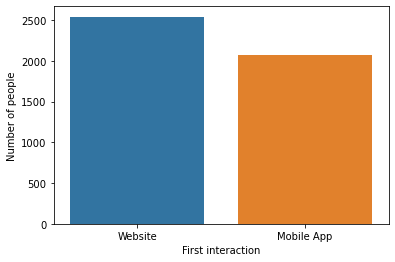

In [444]:
# Count plot: First interactions with the platform
sns.countplot(x = df['first_interaction'])
# Label axes
plt.xlabel("First interaction")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- The plot shows how many people first interacted with the platform through a website or mobile app.
- 2500 had their first interaction through a website, and 200 - through a mobile app. That is 500 people less.

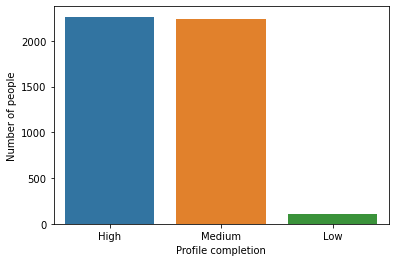

In [445]:
# Count plot: Completion of the profile
sns.countplot(x = df['profile_completed'])
# Label axes
plt.xlabel("Profile completion")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- About 2200 people have a high completion of profile and about 2150 have a medium, only 200 people have a low completion of profile.
- This means that most people have their profiles almost set up completely.

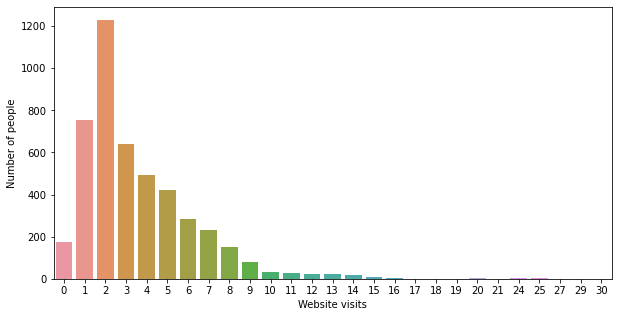

In [446]:
# Increase plot size
plt.figure(figsize=(10, 5))
# Count plot: Website visits
sns.countplot(x = df['website_visits'])
# Label axes
plt.xlabel("Website visits")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- The highest number of people (1250) visit the website 2 times, followed by once by 750 people, then three times by 610 people and then a gradually decreasing number of people as the number of website visits increases.

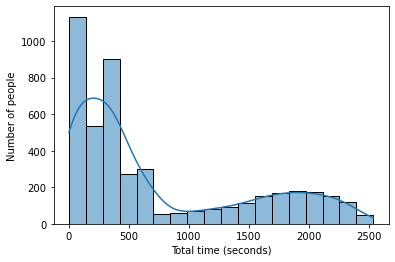

In [447]:
# Histogram: Time spent on the website
sns.histplot(x = df['time_spent_on_website'], kde=True)
# Label axes
plt.xlabel("Total time (seconds)")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- Since the time is a continuous x variable, we use a histogram to visualise the distribution of it.
- By using Kernel density estimation, we see that data is positively skewed.

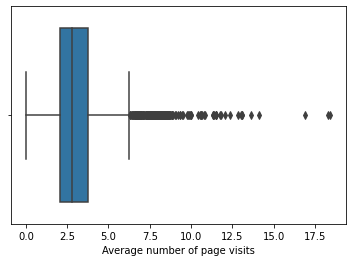

In [448]:
# Box plot: Average number of page visits
sns.boxplot(x = df['page_views_per_visit'])
# Label axes
plt.xlabel("Average number of page visits")
plt.show()

<b>Observations:</b>
- The median is about 3 pages.
- The interquartile range is between 0 and 7 pages.
- There are a lot of outliers on the right which indicates a right skewed distribution.

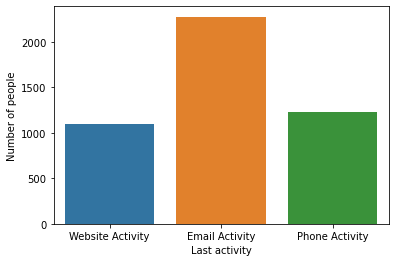

In [449]:
# Count plot: Last activity
sns.countplot(x = df['last_activity'])
# Label axes
plt.xlabel("Last activity")
plt.ylabel("Number of people")
plt.show()

<b>Observations</b>
- Half of all recent activities were emails between leads and ExtraaLearn (2250 people), the phone activities followed with just over a quarter (1200 people) and the lowest activity was on the website (1100 people).

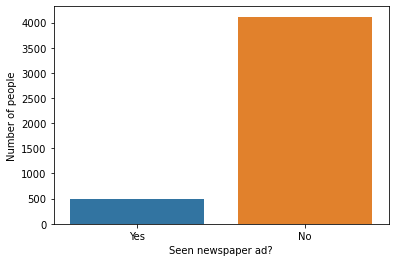

In [450]:
# Count plot: Newspaper ad
sns.countplot(x = df['print_media_type1'])
# Label axes
plt.xlabel("Seen newspaper ad?")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- Most people, over 4000, have not seen ExtraaLearn in a Newspaper ad.

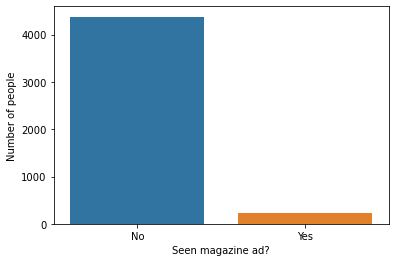

In [451]:
# Count plot: Magazine ad
sns.countplot(x = df['print_media_type2'])
# Label axes
plt.xlabel("Seen magazine ad?")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- Most people, about 4500, have not seen ExtraaLearn in a Magazine ad.

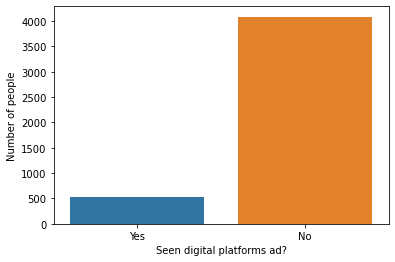

In [452]:
# Count plot: Digital platforms ad
sns.countplot(x = df['digital_media'])
# Label axes
plt.xlabel("Seen digital platforms ad?")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- Most people, about 4000, have not seen ExtraaLearn in a digital platforms ad.

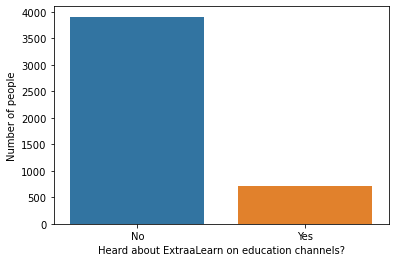

In [453]:
# Count plot: Education channels reach
sns.countplot(x = df['educational_channels'])
# Label axes
plt.xlabel("Heard about ExtraaLearn on education channels?")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- Most people, about 3900, have not heard of ExtraaLearn through educational channels.

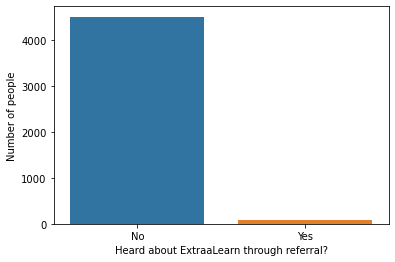

In [454]:
# Count plot: Referral reach
sns.countplot(x = df['referral'])
# Label axes
plt.xlabel("Heard about ExtraaLearn through referral?")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- Most people, about 4500, have not heard of ExtraaLearn through a referral.

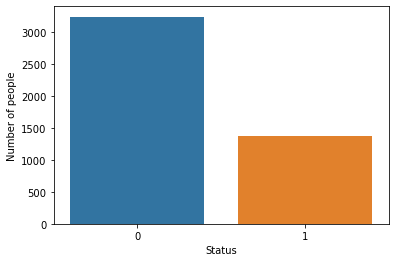

In [455]:
# Count plot: Status count
sns.countplot(x = df['status'])
# Label axes
plt.xlabel("Status")
plt.ylabel("Number of people")
plt.show()

<b>Observations:</b>
- 3200 are unpaid customers and 1400 are paid customers.
- About 2/3 of all people are unpaid customers.

<b>Bivariate analysis</b>

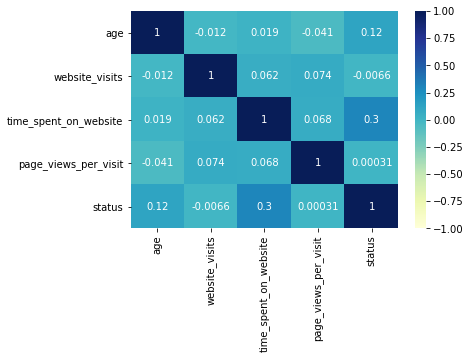

In [456]:
# Heatmap: Comparing numerical values
sns.heatmap(data = df[["age", "website_visits", "time_spent_on_website", "page_views_per_visit", "status"]].corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.show()

<b>Observations:</b>
- There is a slight positive correlation between the time spent on the website and a person's status. This means that it is likely that people who spend more time on the website convert to paying customers.
- There are no other strong correlations between numerical variables.

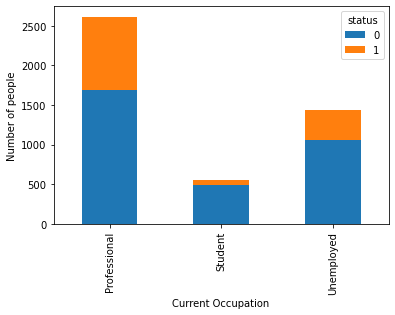

In [457]:
# Stacked bar plot: Count the number of paying/not paying leads in different occupations
tab = pd.crosstab(df['current_occupation'], df['status'])
tab.plot(kind='bar', stacked=True)

# Label axes
plt.xlabel('Current Occupation')
plt.ylabel('Number of people')
plt.show()

<b>Observations</b>
- Most paying customers are professionals, almost 1000.
- The lowest number of paying customers per occupation is students, around 100. This might be because typically students do not make as much income as professionals.
- The number of paying customers for unemployed people is higher than students, about 400 people. This might indicate that unemployed people are trying to learn new skills or improve current ones by using ExtraaLearn in hopes of getting employed in the future.

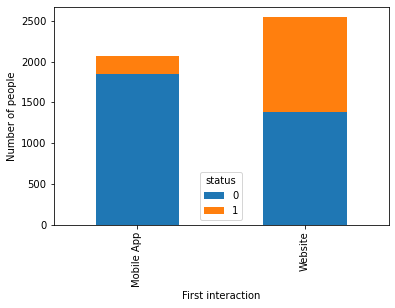

In [458]:
# Stacked bar plot: First channels of interaction impact on the lead status
tab = pd.crosstab(df['first_interaction'], df['status'])
tab.plot(kind='bar', stacked=True)

# Label axes
plt.xlabel('First interaction')
plt.ylabel('Number of people')
plt.show()

<b>Observations:</b>
- More people are paid customers if their first interaction is through a website.
- 500 more people first interacted with ExtraaLearn through a website instead of a mobile app.

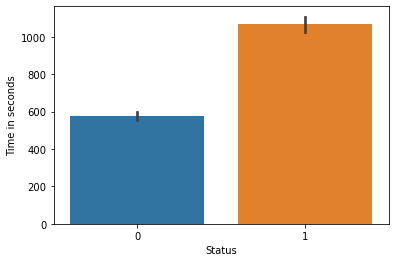

In [459]:
# Bar plot: Time spent on website and status influence
sns.barplot(x=df['status'], y=df['time_spent_on_website'])

# Label axes
plt.xlabel('Status')
plt.ylabel('Time in seconds')
plt.show()

<b>Observations:</b>
- People who spend more time (over 1000s) on the website, become paying customers compared to the ones who do not spend as much time on it (under 600s).

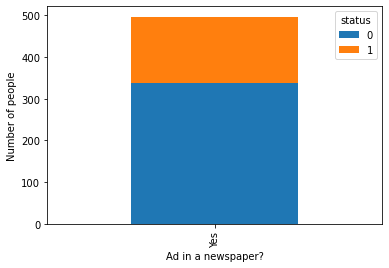

In [460]:
# Only show how many people saw an ad in a newspaper
# Excluded people who did not see an ad in a newspaper as it is not relevant.
filter = df[df['print_media_type1'] == 'Yes']
# Stacked bar plot: How many people who interacted with this channel are paid customers
tab = pd.crosstab(filter['print_media_type1'], df['status'])
tab.plot(kind='bar', stacked=True)

# Label axes
plt.xlabel('Ad in a newspaper?')
plt.ylabel('Number of people')
plt.show()

<b>Observations:</b>
- 500 people have seen an ad in a newspaper.
- Out of those 500 people, about 150 are paying customers.

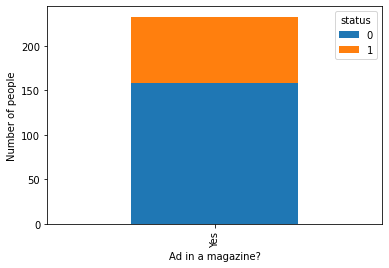

In [461]:
# Only show how many people saw an ad in a magazine
# Excluded people who did not see an ad in a magazine as it is not relevant
filter = df[df['print_media_type2'] == 'Yes']
# Stacked bar plot: How many people who interacted with this channel are paid customers
tab = pd.crosstab(filter['print_media_type2'], df['status'])
tab.plot(kind='bar', stacked=True)

# Label axes
plt.xlabel('Ad in a magazine?')
plt.ylabel('Number of people')
plt.show()

<b>Observations:</b>
- 240 people have seen an ad in a magazine.
- Out of those 240 people, about 150 are paying customers.
- People saw ads in magazines two times less than in newspapers.

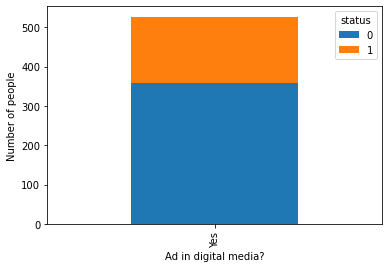

In [462]:
# Only show how many people saw an ad in digital media
# Excluded people who did not see an ad in digital media as it is not relevant
filter = df[df['digital_media'] == 'Yes']
# Stacked bar plot: How many people who interacted with this channel are paid customers
tab = pd.crosstab(filter['digital_media'], df['status'])
tab.plot(kind='bar', stacked=True)

# Label axes
plt.xlabel('Ad in digital media?')
plt.ylabel('Number of people')
plt.show()

<b>Observations:</b>
- 520 people have seen an ad in a magazine.
- Out of those 520 people, about 190 are paying customers.
- People saw ads in digital media two times more than in magazines and slightly more than in newspapers.

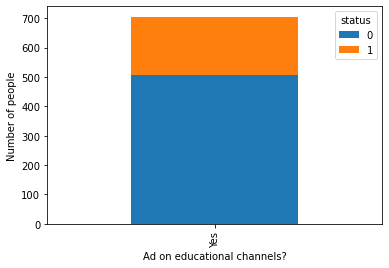

In [463]:
# Only show how many people saw an ad in digital media
# Excluded people who did not see an ad in digital media as it is not relevant
filter = df[df['educational_channels'] == 'Yes']
# Stacked bar plot: How many people who interacted with this channel are paid customers
tab = pd.crosstab(filter['educational_channels'], df['status'])
tab.plot(kind='bar', stacked=True)

# Label axes
plt.xlabel('Ad on educational channels?')
plt.ylabel('Number of people')
plt.show()

<b>Observations:</b>
- 700 people have seen an ad on educational channels.
- Out of those 700 people, about 200 are paying customers.
- More people saw ads on educational channels than any other channel.

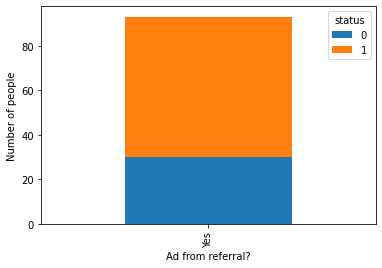

In [464]:
# Only show how many people saw an ad in digital media
# Excluded people who did not see an ad in digital media as it is not relevant
filter = df[df['referral'] == 'Yes']
# Stacked bar plot: How many people who interacted with this channel are paid customers
tab = pd.crosstab(filter['referral'], df['status'])
tab.plot(kind='bar', stacked=True)

# Label axes
plt.xlabel('Ad from referral?')
plt.ylabel('Number of people')
plt.show()

<b>Observations:</b>
- Only 90 people have heard about ExtraaLearn from referrals.
- Out of those 90 people, about 60 are paying customers.
- 2/3 of people who heard about ExtraaLearn from referrals, are paying customers.

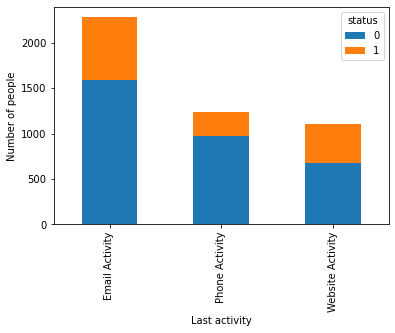

In [465]:
# Stacked bar plot: How many people are paying customers based on last activity
tab = pd.crosstab(df['last_activity'], df['status'])
tab.plot(kind='bar', stacked=True)

# Label axes
plt.xlabel('Last activity')
plt.ylabel('Number of people')
plt.show()

<b>Observations:<b/>
- Based on the last activities, the highest number of paying customers are the ones who had recent email activity, about 1000.
- The least paying customers are the ones who had their last activity as a phone conversation with a representative, only about 250 people.
- Overall the fewest number of people had website activity as their last interaction, but out of all of them, the number of paying customers is not the lowest, about 450.

## Data Preprocessing

<b>Missing values</b>

In [466]:
# Missing values check
df.isnull().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

<b>Observations:</b>
- No missing values detected, no need for missing values treatment.

<b>Outliers</b>

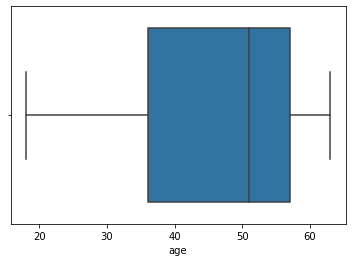

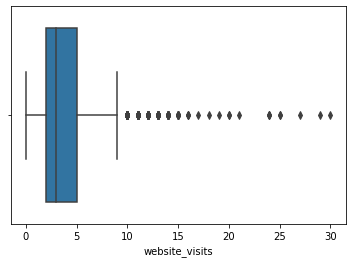

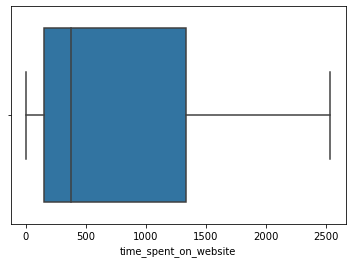

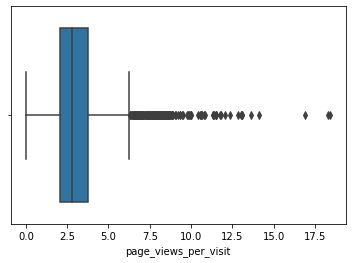

In [467]:
# Outlier detection using boxplots, excluding status
for i in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    sns.boxplot(x=df[i])
    plt.show()

<b>Observations:</b>
- No visible outliers for age and time spent on the website variables.
- Outliers detected for website visits and page views per visit variables.
- The website visits variable is not continuous, whereas the page views variable is.
- There are a few outliers in page views per visit that are further away than the others, and considering that the whole plot is right skewed, we can use outlier treatment on them.

In [468]:
# Formula to calculate IQR: q3 - q1
q1 = df["page_views_per_visit"].quantile(0.25)
q3 = df["page_views_per_visit"].quantile(0.75)
iqr = q3 - q1

In [469]:
# Formula to calculate upper whisker: q3 + 1.5 * IQR
whisker = q3 + 1.5 + iqr

In [470]:
df.loc[df["page_views_per_visit"] > 15.00, "page_views_per_visit"] = whisker

<b>Observations:</b>
- This outliers treatment works by matching outliers to upper whisker.
- Since the page views per visit variable is continuous and has noticeable outliers above 15.00, we perform outlier treatment on it.

<b>Preparing data for modeling</b>

In [471]:
# Seperate independent variables
x = df.drop('status', axis = 1)
# Seperate target variable
y = df['status']

In [472]:
# Represent categorical variables with 1s and 0s
x = pd.get_dummies(x, drop_first = True)

In [473]:
# Split into training and testing data
# Using 30% of data for testing as this is the standard
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, shuffle = True)

In [474]:
# Make sure data remains the correct size, together [4612 rows x 16 columns]
print("Training dataset:", x_train.shape)
print("Testing dataset:", x_test.shape)

Training dataset: (3228, 16)
Testing dataset: (1384, 16)


In [475]:
# Confusion matrix and classification report function
def metrics_score(actual, predicted):
    # Print classification report: precision, recall, f1-score, support
    print(classification_report(actual, predicted))

    # Create confusion matrix variable
    cm = confusion_matrix(actual, predicted)

    # Set plot size
    plt.figure(figsize = (8, 5))

    # Create a heatmap for the confusion matrix
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not paid', 'Paid'], yticklabels = ['Not paid', 'Paid'])
    
    # Label axes
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [476]:
# Build a decision tree classifier
dt = DecisionTreeClassifier(random_state = 1)
# Fit the classifier on training data
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



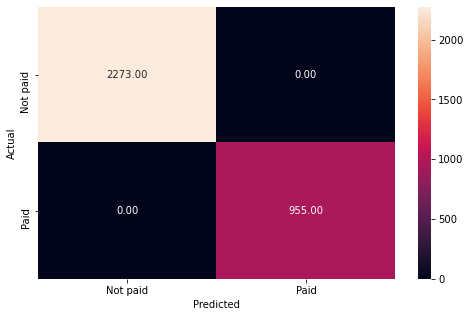

In [477]:
# Checking performance on the training data
pred_y_train = dt.predict(x_train)
metrics_score(y_train, pred_y_train)

<b>Observations:</b>
- The accuracy is 100%, which means that it is perfect.
- Precision, recall, and f1-score all have 100% accuracy.
- These insights are a bit concerning, there might be a risk of model overfitting.

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



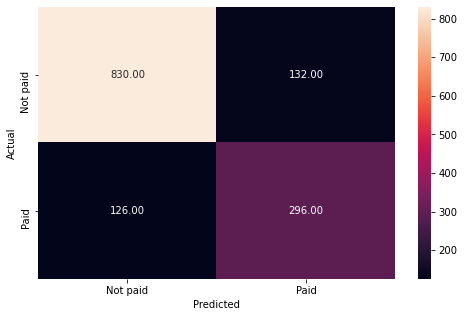

In [478]:
# Checking performance on the test data
pred_y_test = dt.predict(x_test)
metrics_score(y_test, pred_y_test)

<b>Observations:</b>
- The accuracy of this model is 81%.
- For status 0, precision, recall and f1-score are all high, 87%, 86% and 87% respectively.
- For state 1, precision, recall and f1-score were not as high, 69%, 70% and 70% respectively.
- This indicates an imbalance in the weights between paid and not paid customers. Not-paid customers are the majority. In this case, we want to focus on leads that are likely to convert, therefore we need to use class weights to fix the imbalance.
- Need to fix overfitting.

In [479]:
# Using 1 to normalize the proportion of the status variable
# Will use opposite values in class weight to fix the imbalance
print(df['status'].value_counts(1))

0    0.701431
1    0.298569
Name: status, dtype: float64


## Model Performance evaluation and improvement

In [480]:
# Including class_weight hyperparameter based on normalized status variable results to reduce the bias of the model
tuned_dt = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

parameters = {
    'max_depth': np.arange(2,20),
    'min_samples_leaf': np.arange(5,10),
    'criterion': ['gini', 'entropy']
}

# Use recall for class 1 when comparing parameters
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Perform grid search
grid_obj = GridSearchCV(tuned_dt, parameters, scoring = scorer, cv = 10)
grid_obj = grid_obj.fit(x_train, y_train)

# Classifier is set to the best combination of parameters
tuned_dt = grid_obj.best_estimator_

# Best algorithm fit to the data
tuned_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



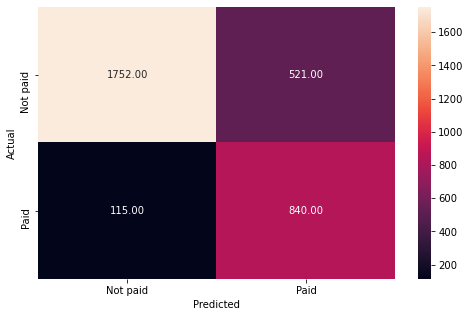

In [481]:
# Checking performance on the training data
pred_y_train_tuned = tuned_dt.predict(x_train)
metrics_score(y_train, pred_y_train_tuned)

<b>Observations:</b>
- After performing hyperparameter tuning, the accuracy of training data has decreased by 20%.
- This is because we reduced the complexity of the tree by setting max_depth to 3.
- Since we reduced overfitting, the accuracy also decreased on a training set.

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



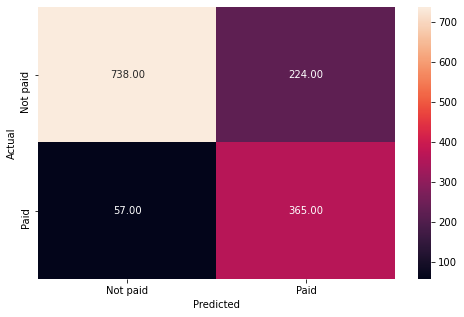

In [482]:
# Checking performance on the test data
pred_y_test_tuned = tuned_dt.predict(x_test)
metrics_score(y_test, pred_y_test_tuned)

<b>Observations:</b>
- The recall for state 1 has increased by 16% compared to the previous model, this means that people who are converted are identified but since precision decreased by 1%, it identifies that there might be more people identified as converted customers when in reality they are not.
- This does not affect our solution much since we are focusing on identifying customers that might convert and it would be worse to lose a potential customer.

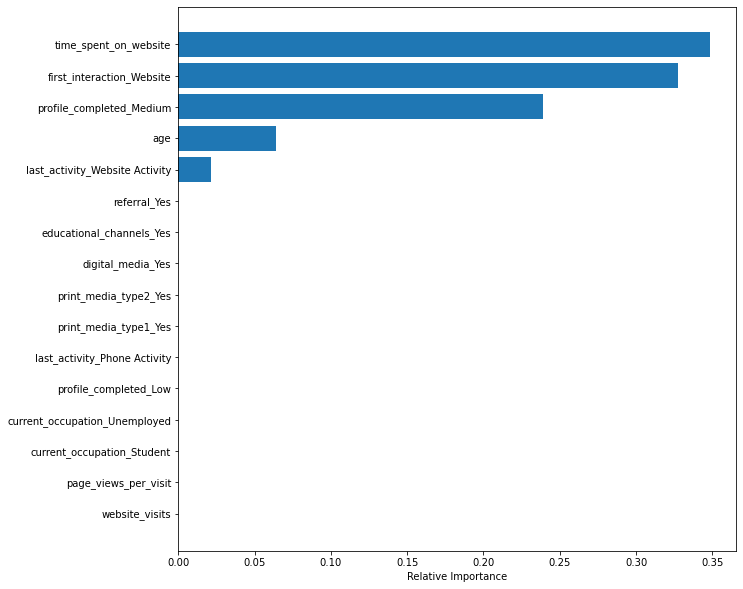

In [483]:
# Checking feature importance
importances = tuned_dt.feature_importances_
indices = np.argsort(importances)

names = list(x.columns)

plt.figure(figsize = (10, 10))
plt.barh(range(len(indices)), importances[indices])

plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<b>Observations:</b>
- The features importance bar plot indicates that the most important features which determine if the customer will convert to a paying customer are time spent on the website.
- It is followed by how customers interact with the platform. The website interactions attract a lot of paying customers.
- Completion of the profile should be at least halfway done to have a paying customer.
- The age also plays an important role in conversion but is less important than the ones mentioned above. 

## Building a Random Forest model

In [484]:
# Build a random forest tree classifier
rf = RandomForestClassifier(random_state = 1)
# Fit the classifier on training data
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



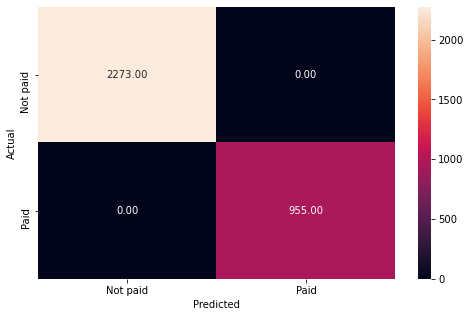

In [485]:
# Checking performance on the train data
pred_y_train = rf.predict(x_train)
metrics_score(y_train, pred_y_train)

<b>Observations:</b>
- The accuracy is 100%, which means that it is perfect.
- Precision, recall, and f1-score all have 100% accuracy.
- These insights are a bit concerning, there might be a risk of model overfitting.

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



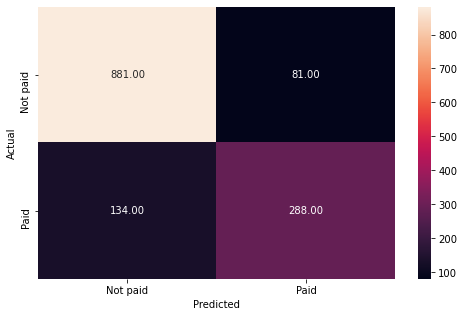

In [486]:
# Checking performance on the test data
pred_y_test = rf.predict(x_test)
metrics_score(y_test, pred_y_test)

<b>Observations:</b>
- Overall accuracy is 84%. This is higher than the first Decision Tree model.
- For status 0, precision, recall and f1-score are all high, 87%, 92% and 89% respectively.
- For state 1, precision, recall and f1-score were not as high, 78%, 68% and 73% respectively.
- For status 0, the recall is higher than precision which indicates that this model is good at identifying true negatives, but is not as good at avoiding false positives.
- For status 1, the precision is higher than recall which indicates fewer false positives, but also missing some true positives.
- The f1-score was higher for state 0 than state 1, this means the model better identifies customers who do not pay.
- This model is good if identifying non-paying customers is more important, but in our case, it is more important to find paying customers.
- Need to fix overfitting.

## Model Performance evaluation and improvement

In [487]:
tuned_rf = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1, criterion = 'entropy')

parameters = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 110],
    'max_features': [0.8, 1]
}

# Use recall for class 1 when comparing parameters
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Perform grid search
grid_obj = GridSearchCV(tuned_rf, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Classifier is set to the best combination of parameters
tuned_rf = grid_obj.best_estimator_

# Best algorithm fit to the data
tuned_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=5, max_features=0.8, n_estimators=110,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.69      0.87      0.77       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.83      3228
weighted avg       0.86      0.84      0.85      3228



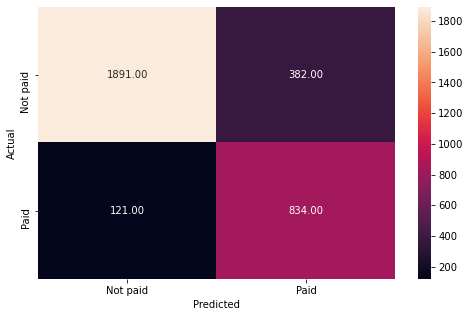

In [488]:
# Checking performance on the training data
pred_y_train_tuned = tuned_rf.predict(x_train)
metrics_score(y_train, pred_y_train_tuned)

<b>Observations:</b>
- After performing hyperparameter tuning, the accuracy of training data has decreased by 16%.
- This is because we reduced the complexity of the tree by setting max_depth to 5.
- Since we reduced overfitting, the accuracy also decreased on a training set.

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       962
           1       0.70      0.86      0.77       422

    accuracy                           0.84      1384
   macro avg       0.81      0.85      0.82      1384
weighted avg       0.86      0.84      0.85      1384



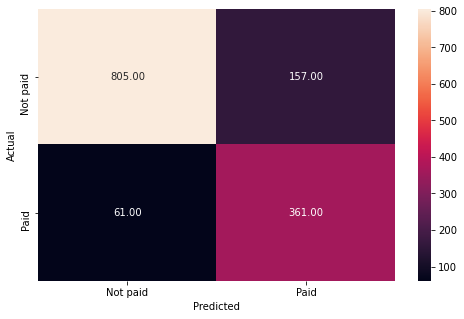

In [489]:
# Checking performance on the test data
pred_y_test_tuned = tuned_rf.predict(x_test)
metrics_score(y_test, pred_y_test_tuned)

<b>Observations:</b>
- The recall for state 1 has increased by 18% compared to the previous model, this means that people who are converted are identified but since precision decreased by 8%, it identifies that there might be more people identified as converted customers when in reality they are not.
- This does not affect our solution much since we are focusing on identifying customers that might convert and it would be worse to lose a potential customer.

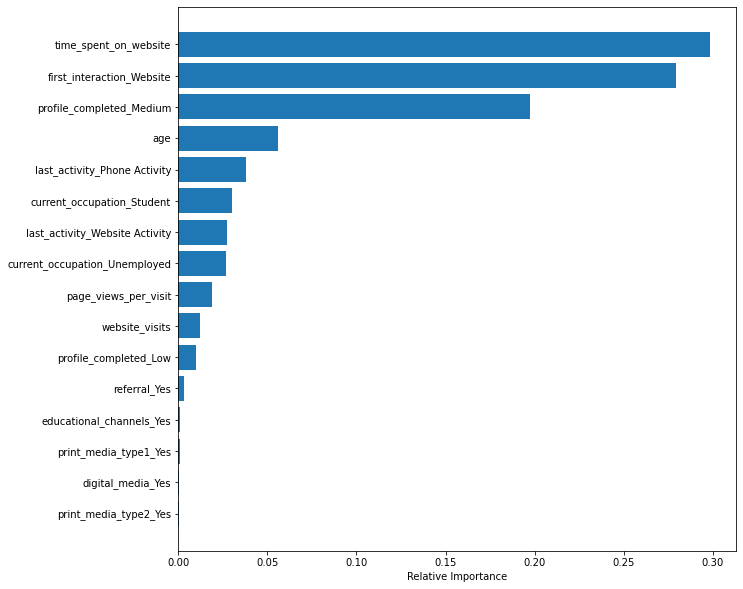

In [490]:
# Checking feature importance
importances = tuned_rf.feature_importances_
indices = np.argsort(importances)

names = list(x.columns)

plt.figure(figsize = (10, 10))
plt.barh(range(len(indices)), importances[indices])

plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<b>Observations:</b>
- The features importance bar plot indicates that the most important features which determine if the customer will convert to a paying customer are time spent on the website, the same as with a decision tree model.
- It is followed by how customers interact with the platform. The website interactions attract a lot of paying customers.
- Completion of the profile should be at least halfway done to have a paying customer.
- The age also plays an important role in conversion but is less important than the ones mentioned above.
- A noticeable difference from the decision tree model is that now more features can be identified as having a significant role in the conversion process. These include people who are students, last interacted with ExtraaLearn through a website, unemployed people, number of website visits.

## Actionable Insights and Recommendations

<b>Conclusions and Recommendations:</b>
- After analysing the data, we can tell that most people who convert to paid customers are the ones who spend the most time on the website. The business should strive to engage the user to stay on their website longer for them to be willing to pay.
- We noticed that current advertisement tactics do not drive that many people to convert to paying customers. It was either a very small percentage of people did not even see the ad. This could be improved by choosing channels that worked best such as increasing the number of referrals. This could be encouraged with incentives to refer a friend.
- Overall, the portion of people who are not paying customers is significantly higher than paying customers. It would be good to perform this analysis in the future again to check how implemented changes have affected the predictions and number of paying customers.